<a href="https://colab.research.google.com/github/shivamshahi75/shivamshahi7.github.io/blob/main/lung_cancer_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Load new CSV
df = loadtxt('Lung Cancer Detection.csv', delimiter=",",skiprows=1)
# Remove 1st colomn (excluding 'PatientID')
df = df[:,1:]
df

array([[33.,  1.,  2., ...,  3.,  4.,  1.],
       [17.,  1.,  3., ...,  7.,  2.,  2.],
       [35.,  1.,  4., ...,  7.,  2.,  3.],
       ...,
       [25.,  2.,  4., ...,  7.,  2.,  3.],
       [18.,  2.,  6., ...,  2.,  3.,  3.],
       [47.,  1.,  6., ...,  7.,  2.,  3.]])

In [ ]:
np.info(df)

class:  ndarray
shape:  (1000, 24)
strides:  (200, 8)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  False
data pointer: 0x4a5a008
byteorder:  little
byteswap:  False
type: float64


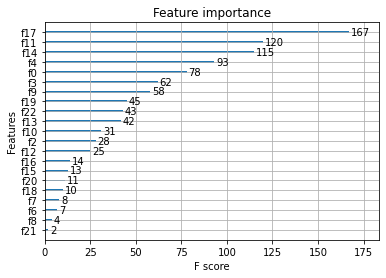

In [ ]:
# Feature Selection by plotting feature importance
X = df[:,0:23]
y = df[:,23]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
# split data into X and y
X = df[:,0:23]
Y = df[:,23]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)
  # eval model
  select_X_test = selection.transform(X_test)
  predictions = selection_model.predict(select_X_test)
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
      accuracy*100.0))

Accuracy: 100.00%
Thresh=0.000, n=23, Accuracy: 100.00%
Thresh=0.001, n=22, Accuracy: 100.00%
Thresh=0.001, n=21, Accuracy: 100.00%
Thresh=0.001, n=20, Accuracy: 100.00%
Thresh=0.001, n=19, Accuracy: 100.00%
Thresh=0.001, n=18, Accuracy: 100.00%
Thresh=0.002, n=17, Accuracy: 100.00%
Thresh=0.002, n=16, Accuracy: 100.00%
Thresh=0.006, n=15, Accuracy: 100.00%
Thresh=0.007, n=14, Accuracy: 100.00%
Thresh=0.015, n=13, Accuracy: 100.00%
Thresh=0.015, n=12, Accuracy: 100.00%
Thresh=0.022, n=11, Accuracy: 100.00%
Thresh=0.033, n=10, Accuracy: 100.00%
Thresh=0.036, n=9, Accuracy: 100.00%
Thresh=0.051, n=8, Accuracy: 100.00%
Thresh=0.054, n=7, Accuracy: 100.00%
Thresh=0.059, n=6, Accuracy: 100.00%
Thresh=0.061, n=5, Accuracy: 100.00%
Thresh=0.090, n=4, Accuracy: 100.00%
Thresh=0.104, n=3, Accuracy: 96.67%
Thresh=0.197, n=2, Accuracy: 93.03%
Thresh=0.241, n=1, Accuracy: 77.58%


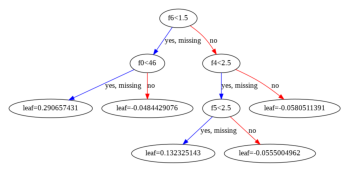

In [ ]:
# Visualizing Trees
from xgboost import plot_tree
# split data into X and y
X = df[:,0:8]
y = df[:,8]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot single tree
plot_tree(model)
pyplot.show()

In [ ]:
#Training the Model

# split data into X and y
X = df[:,0:8]
Y = df[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
    random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.18%


In [ ]:
# stratified k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# split data into X and y
X = df[:,0:8]
Y = df[:,8]
# CV model
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 97.80% (1.54%)


Accuracy: 98.18%


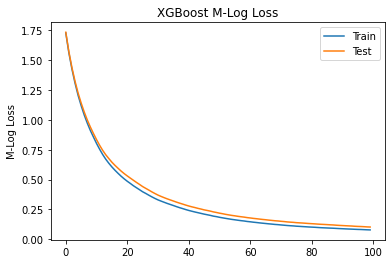

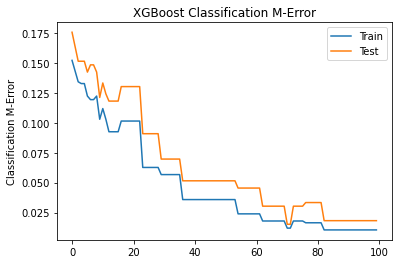

In [ ]:
# Model Evaluation

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["merror","mlogloss"], eval_set=eval_set,verbose=False)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('M-Log Loss')
pyplot.title('XGBoost M-Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification M-Error')
pyplot.title('XGBoost Classification M-Error')
pyplot.show()